In [43]:
%load_ext autoreload

%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import torch

sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
baselines = np.array([0.95, 0.925, 0.9, 0.875, 0.8, 0.75, 0.7])
base_feature_sizes = np.array([9, 12, 15, 18, 24, 30, 45])

solved = [9, 12, 15, 18]

In [45]:
def load_nn_results(completed_feature_sizes):
    results = []
    for feature_size in completed_feature_sizes:
        try:
            df = pd.read_csv(f'results/nn_results_{feature_size}.csv')

            results.append(df)
        except:
            print(f'Skipping Neural Networks for n={feature_size}')

    merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)
    return merged_df

def load_rf_results(completed_feature_sizes):
    results = []
    for feature_size in completed_feature_sizes:
        try: 
            df = pd.read_csv(f'results/rf_results_{feature_size}.csv')

            results.append(df)
        except:
            print(f'Skipping Random Forest for n={feature_size}')

    merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)
    return merged_df

def load_log_results(completed_feature_sizes):
    results = []
    for feature_size in completed_feature_sizes:
        try:
            df = pd.read_csv(f'results/log_results_{feature_size}.csv')

            results.append(df)
        except:
            print(f'Skipping Logistic Regression for n={feature_size}')

    merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)
    return merged_df

In [46]:
nn_df = load_nn_results(solved)
rf_df = load_rf_results(solved)
log_df = load_log_results(solved)

Skipping Logistic Regression for n=18


C:\Users\Mihai\AppData\Local\Temp\ipykernel_19444\1221789685.py:37: FutureWarning: The behavior of pd.concat with len(keys) != len(objs) is deprecated. In a future version this will raise instead of truncating to the smaller of the two sequences
  merged_df = pd.concat(results, keys=completed_feature_sizes, names=['Feature size']).reset_index(level=0)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


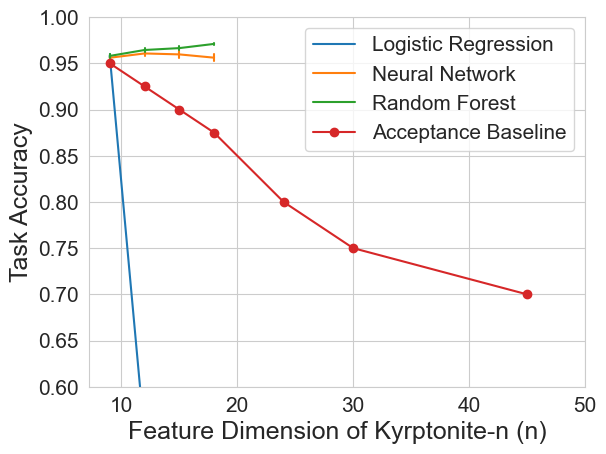

In [51]:
sns.set_style("whitegrid")
nn_plt = sns.lineplot(log_df, x='Feature size', y='test_accuracy', errorbar='sd', label='Logistic Regression', err_style="bars")
sns.lineplot(nn_df.groupby(['Feature size', 'Seed']).mean(), x='Feature size', y='test_accuracy', errorbar='sd', label='Neural Network', ax=nn_plt, err_style="bars")

nn_plt.set_xlabel('Feature Dimension of Kyrptonite-n (n)', fontsize=18)
nn_plt.set_ylabel('Task Accuracy', fontsize=18)
# nn_plt.set_title('Test Accuracy', fontsize=16)
nn_plt.set(ylim=(0.6, 1.0))


sns.lineplot(rf_df, x='Feature size', y='test_accuracy', errorbar='sd', ax=nn_plt, label='Random Forest', err_style="bars")

nn_plt.plot(base_feature_sizes, baselines, label='Acceptance Baseline', marker='o')
# for i in range(len(baselines)):
#    nn_plt.annotate(str(baselines[i]), (base_feature_sizes[i], baselines[i]), textcoords="offset points", xytext=(12,9), ha='center', fontsize=12, color='#FF6666')

plt.xticks(fontsize=15, ticks=range(10, 50 + 1, 10))
plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.savefig('../images/accuracy_plot.eps')
plt.show()

In [48]:
print(nn_df.groupby('Feature size').mean()['test_accuracy'] * 100, (nn_df * 100).groupby('Feature size').std()['test_accuracy'])

Feature size
9     95.602778
12    96.068750
15    95.966667
18    95.611111
Name: test_accuracy, dtype: float64 Feature size
900     0.220257
1200    0.283207
1500    0.350493
1800    0.376472
Name: test_accuracy, dtype: float64


In [49]:
print(rf_df.groupby('Feature size').mean()['test_accuracy'] * 100, (rf_df * 100).groupby('Feature size').std()['test_accuracy'])

Feature size
9     95.800000
12    96.441667
15    96.646667
18    97.101389
Name: test_accuracy, dtype: float64 Feature size
900     0.256199
1200    0.253220
1500    0.206649
1800    0.139973
Name: test_accuracy, dtype: float64


In [50]:
print(log_df.groupby('Feature size').mean()['test_accuracy'] * 100, (log_df * 100).groupby('Feature size').std()['test_accuracy'])

Feature size
9     95.800000
12    54.664583
15    53.693333
Name: test_accuracy, dtype: float64 Feature size
900     0.256199
1200    1.056124
1500    0.679878
Name: test_accuracy, dtype: float64
